In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv('news_api_key')


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles
# Using .get_everything because .get_top_headlines only returned 2 articles
bitcoin_news = newsapi.get_everything(q = 'bitcoin', language = 'en')




In [6]:
bitcoin_news['articles'][0]['content']

'Since its inception in 2009, Bitcoin has made and ruined fortunes, helped sell fentanyl and books about cryptocurrency, withstood literally millions of jokes and just as many predictions of imminent collapse, andthrough a process opaque to most people, myself… [+10529 chars]'

In [7]:
# Fetch the Ethereum news articles
# Using .get_everything because .get_top_headlines did not return any articles
ethereum_news = newsapi.get_everything(q = 'ethereum', language = 'en')


In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_news["articles"]:
    big_string = article['title'] + ' ' + article['content']
    sentiment = analyzer.polarity_scores(big_string)
    bitcoin_sentiments.append({
        "compound": sentiment["compound"],
        "positive": sentiment["pos"],
        "negative": sentiment["neg"],
        "neutral": sentiment["neu"],
        "date": article["publishedAt"][:10],
        "text": article["content"]
       
            
        })
        
bitcoin_df = pd.DataFrame(bitcoin_sentiments)  
bitcoin_df

,compound,positive,negative,neutral,date,text
0,-0.6486,0.039,0.123,0.838,2019-10-07,"Since its inception in 2009, Bitcoin has made ..."
1,-0.8720,0.000,0.168,0.832,2019-10-02,New allegations against a bitcoin developer sp...
2,-0.4767,0.000,0.054,0.946,2019-10-16,Say it with me: Bitcoin is not anonymous. \r\n...
3,0.5719,0.118,0.060,0.822,2019-10-16,Federal authorities in the U.S. have unsealed ...
4,0.8119,0.184,0.030,0.787,2019-09-23,This isn't surprising given Facebook's home tu...
5,0.5070,0.056,0.000,0.944,2019-09-23,Our robot colleague Satoshi Nakaboto writes ab...
6,-0.0418,0.063,0.068,0.869,2019-09-23,The Fine Print: The following comments are own...
7,0.5070,0.055,0.000,0.945,2019-09-18,Our robot colleague Satoshi Nakaboto writes ab...
8,0.6461,0.101,0.000,0.899,2019-10-12,Our robot colleague Satoshi Nakaboto writes ab...
9,0.6879,0.097,0.000,0.903,2019-09-19,Our robot colleague Satoshi Nakaboto writes ab...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_news["articles"]:
    big_string = article['title'] + ' ' + article['content']
    sentiment = analyzer.polarity_scores(big_string)
    ethereum_sentiments.append({
        "compound": sentiment["compound"],
        "positive": sentiment["pos"],
        "negative": sentiment["neg"],
        "neutral": sentiment["neu"],
        "date": article["publishedAt"][:10],
        "text": article["content"]
       
            
        })
        
ethereum_df = pd.DataFrame(ethereum_sentiments)  
ethereum_df

,compound,positive,negative,neutral,date,text
0,0.3818,0.051,0.000,0.949,2019-10-02,IKEA Iceland has used Ethereum ETHtechnology t...
1,0.2732,0.056,0.000,0.944,2019-09-23,Blockchains like Ethereums are often pitched a...
2,0.4019,0.050,0.000,0.950,2019-10-17,TLDR: The Complete Blockchain and Ethereum Pro...
3,0.6879,0.097,0.000,0.903,2019-09-19,Our robot colleague Satoshi Nakaboto writes ab...
4,0.1027,0.053,0.045,0.902,2019-10-09,"Further to its previous blockchain exploits, t..."
5,0.3612,0.076,0.027,0.897,2019-10-10,"Australias Perth Mint, one of the worlds large..."
6,0.3612,0.050,0.000,0.950,2019-10-13,Announced at Ethereum Foundation's Devcon 5 co...
7,-0.5095,0.028,0.070,0.903,2019-10-07,The total transactional volume of blockchain a...
8,-0.9327,0.038,0.237,0.725,2019-10-03,"MakerDAO, the decentralized organization that ..."
9,0.4299,0.105,0.056,0.838,2019-09-30,"Good morning Forkers, you know what time it is..."


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.335170,0.068250,0.029450,0.90235
std,0.475527,0.040184,0.047009,0.04986
min,-0.872000,0.000000,0.000000,0.78700
25%,0.404050,0.054000,0.000000,0.88100
50%,0.507000,0.056500,0.000000,0.91000
75%,0.590450,0.086500,0.054000,0.94425
max,0.811900,0.184000,0.168000,0.94800


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.043365,0.06085,0.053150,0.886000
std,0.445447,0.03618,0.065291,0.079439
min,-0.932700,0.00000,0.000000,0.685000
25%,-0.197100,0.04550,0.000000,0.868250
50%,0.187950,0.05450,0.045000,0.902500
75%,0.366350,0.08125,0.067750,0.945250
max,0.687900,0.14300,0.237000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in output]
    return tokens


In [14]:
# Create a new tokens column for bitcoin
tokens = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df['tokens'] = tokens
bitcoin_df

,compound,positive,negative,neutral,date,text,tokens
0,-0.6486,0.039,0.123,0.838,2019-10-07,"Since its inception in 2009, Bitcoin has made ...","[since, inception, bitcoin, made, ruined, fort..."
1,-0.8720,0.000,0.168,0.832,2019-10-02,New allegations against a bitcoin developer sp...,"[new, allegation, bitcoin, developer, spurred,..."
2,-0.4767,0.000,0.054,0.946,2019-10-16,Say it with me: Bitcoin is not anonymous. \r\n...,"[say, bitcoin, anonymousthree, hundred, thirty..."
3,0.5719,0.118,0.060,0.822,2019-10-16,Federal authorities in the U.S. have unsealed ...,"[federal, authority, u, unsealed, charge, sout..."
4,0.8119,0.184,0.030,0.787,2019-09-23,This isn't surprising given Facebook's home tu...,"[isnt, surprising, given, facebooks, home, tur..."
5,0.5070,0.056,0.000,0.944,2019-09-23,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
6,-0.0418,0.063,0.068,0.869,2019-09-23,The Fine Print: The following comments are own...,"[fine, print, following, comment, owned, whoev..."
7,0.5070,0.055,0.000,0.945,2019-09-18,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,0.6461,0.101,0.000,0.899,2019-10-12,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,0.6879,0.097,0.000,0.903,2019-09-19,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [61]:
# Create a new tokens column for ethereum
tokens2 = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df['tokens'] = tokens2
ethereum_df

,compound,positive,negative,neutral,date,text,tokens
0,0.3818,0.051,0.000,0.949,2019-10-02,IKEA Iceland has used Ethereum ETHtechnology t...,"[ikea, iceland, used, ethereum, ethtechnology,..."
1,0.2732,0.056,0.000,0.944,2019-09-23,Blockchains like Ethereums are often pitched a...,"[blockchains, like, ethereums, often, pitched,..."
2,0.4019,0.050,0.000,0.950,2019-10-17,TLDR: The Complete Blockchain and Ethereum Pro...,"[tldr, complete, blockchain, ethereum, program..."
3,0.6879,0.097,0.000,0.903,2019-09-19,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.1027,0.053,0.045,0.902,2019-10-09,"Further to its previous blockchain exploits, t...","[previous, blockchain, exploit, united, nation..."
5,0.3612,0.076,0.027,0.897,2019-10-10,"Australias Perth Mint, one of the worlds large...","[australia, perth, mint, one, world, largest, ..."
6,0.3612,0.050,0.000,0.950,2019-10-13,Announced at Ethereum Foundation's Devcon 5 co...,"[announced, ethereum, foundation, devcon, conf..."
7,-0.5095,0.028,0.070,0.903,2019-10-07,The total transactional volume of blockchain a...,"[total, transactional, volume, blockchain, app..."
8,-0.9327,0.038,0.237,0.725,2019-10-03,"MakerDAO, the decentralized organization that ...","[makerdao, decentralized, organization, run, e..."
9,0.4299,0.105,0.056,0.838,2019-09-30,"Good morning Forkers, you know what time it is...","[good, morning, forkers, know, time, moonday, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [62]:
from collections import Counter
from nltk import ngrams

In [69]:
# Generate the Bitcoin N-grams where N=2
def big_list_maker(token_lists):
    # Takes a list of tokens from each row from a df column 
    # and returns one large list
    big_list = []
    for list in token_lists:
        for token in list:
            big_list.append(token)
    return big_list

bit_coin_bigrams_count = Counter(ngrams(big_list_maker(bitcoin_df['tokens']), n = 2))
bit_coin_bigrams_count.most_common(10)

[(('satoshi', 'nakaboto'), 28),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'daywelcome'), 14),
 (('daywelcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'bitcoin'), 14)]

In [70]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams_count = Counter(ngrams(big_list_maker(ethereum_df['tokens']), n = 2))
ethereum_bigrams_count.most_common(10)

[(('bitcoin', 'btc'), 4),
 (('uk', 'police'), 3),
 (('satoshi', 'nakaboto'), 2),
 (('perth', 'mint'), 2),
 (('ethereum', 'eth'), 2),
 (('hard', 'fork'), 2),
 (('ripple', 'xrp'), 2),
 (('security', 'law'), 2),
 (('char', 'uk'), 2),
 (('criminallyseized', 'bitcoin'), 2)]

In [73]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [83]:
# Get the top 10 words for Bitcoin
bitcoin_word_counts_most_common = token_count(big_list_maker(bitcoin_df['tokens']))
bitcoin_word_counts_most_common

[('bitcoin', 46),
 ('satoshi', 29),
 ('nakaboto', 28),
 ('char', 19),
 ('say', 15),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14)]

In [84]:
# Get the top 10 words for Ethereum
ethereum_word_counts_most_common = token_count(big_list_maker(ethereum_df['tokens']))
ethereum_word_counts_most_common

[('char', 20),
 ('bitcoin', 7),
 ('ethereum', 6),
 ('blockchain', 5),
 ('today', 5),
 ('cryptocurrency', 5),
 ('security', 5),
 ('auction', 5),
 ('btc', 4),
 ('financial', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

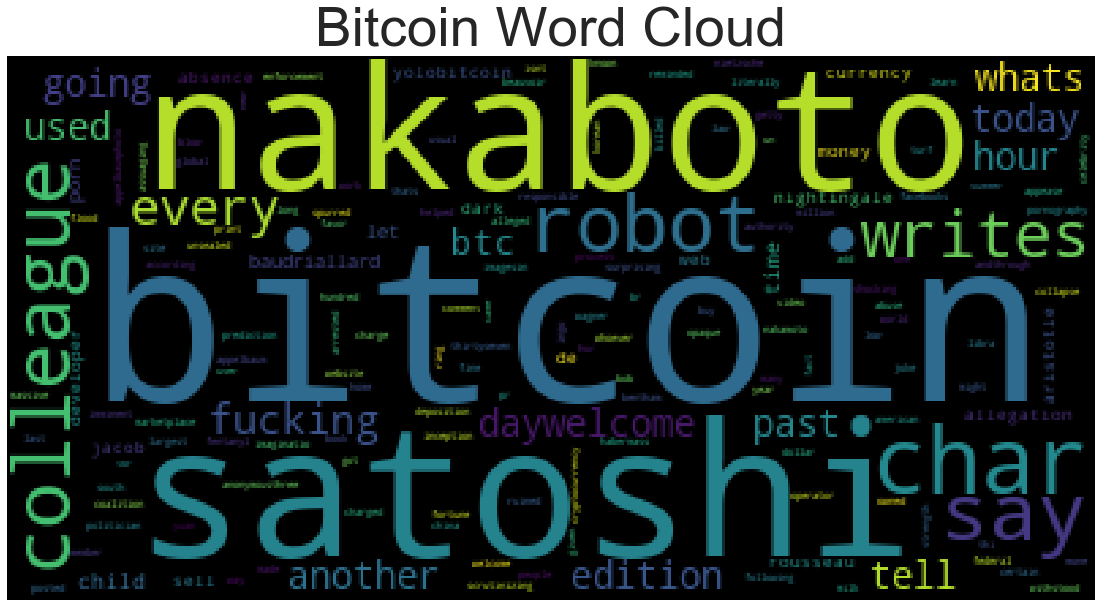

In [114]:
# Generate the Bitcoin word cloud
token_list = big_list_maker(bitcoin_df['tokens'])
input_words = ' '.join(token_list)
wc = WordCloud(collocations = False).generate(input_words)
plt.axis('off')
plt.title('Bitcoin Word Cloud', fontdict = {'fontsize' : 55})
plt.imshow(wc)

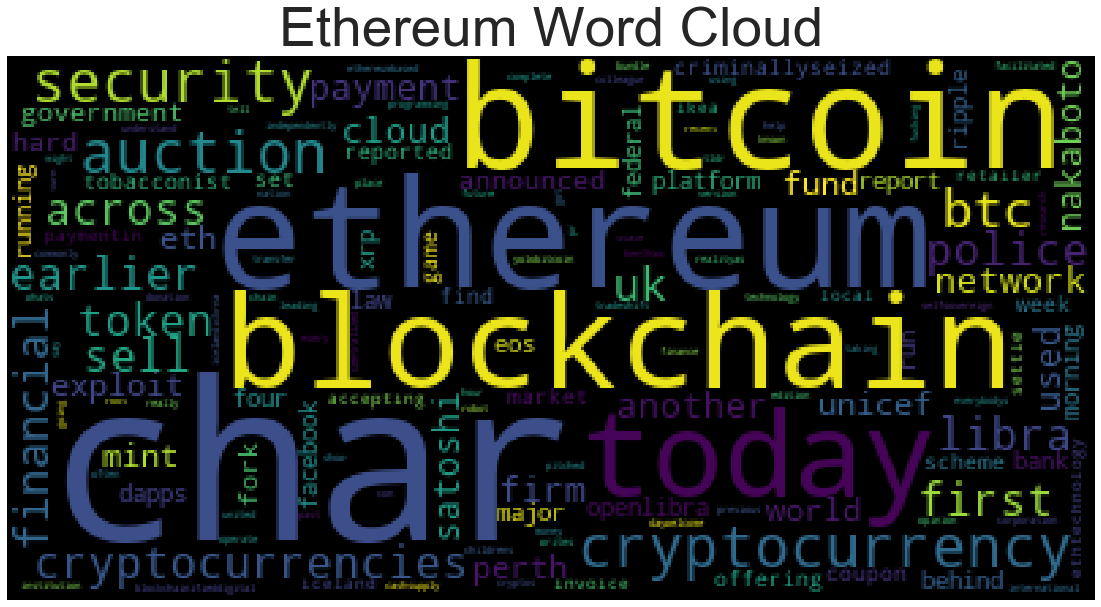

In [115]:
# Generate the Ethereum word cloud
token_list = big_list_maker(ethereum_df['tokens'])
input_words = ' '.join(token_list)
wc = WordCloud(collocations = False).generate(input_words)
plt.axis('off')
plt.title('Ethereum Word Cloud', fontdict = {'fontsize' : 55})
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [116]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [117]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [131]:
# Concatenate all of the bitcoin text together
bitcoin_big_string = ' '.join(bitcoin_df['text'])


In [132]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"


In [133]:
# Render the visualization
displacy.render(bitcoin_doc, style ='ent')

In [134]:
# List all Entities
def list_all_entities(doc):
    for ent in doc.ents:
        print(ent.text, ent.label_)
        
list_all_entities(bitcoin_doc)

2009 DATE
Bitcoin PERSON
millions CARDINAL
+10529 NORP
Jacob Appelbaum PERSON
Ingo Wagner / Getty Images ORG
the summer of 2016 DATE
Tor ORG
Jacob Appelbaum PERSON
Bitcoin PERSON
Three hundred and thirty-seven CARDINAL
last year DATE
U.S. GPE
South Korean NORP
Welcome FAC
Video NORP
Bitcoin PERSON
Facebook ORG
US GPE
Libra GPE
China GPE
American NORP
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Aristotle PERSON
The Fine Print ORG
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Rousseau PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Rousseau PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Bentham ORG
Yolo PERSON
Bitcoin PERSON
Satoshi Nakaboto PER

---

## Ethereum NER

In [136]:
# Concatenate all of the bitcoin text together
ethereum_big_string = ' '.join(ethereum_df['text'])
ethereum_big_string

'IKEA Iceland has used Ethereum ETHtechnology to settle an invoice with a local retailer, accepting payment\xa0in blockchainified\xa0digital cash.\r\nSupply chain payments firm Tradeshift facilitated the transfer using an Ethereum-based version of the Icelandic\xa0króna … [+1062 chars] Blockchains like Ethereums are often pitched as self-sovereign money networks that operate independently of states, financial institutions, and corporations\xa0 but recent research shows this might not be reality.\r\nAs it turns out, its really centralized cloud s… [+3927 chars] TLDR: The Complete Blockchain and Ethereum Programming Bundle help you understand cryptocurrencies and its root technology for under $30.\r\nEverybodys got an opinion about cryptocurrencies and their future place in international finance. As leading cryptos con… [+1413 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, 

In [138]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)


# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"


In [139]:
# Render the visualization
displacy.render(ethereum_doc, style ='ent')

In [140]:
# List all Entities
list_all_entities(ethereum_doc)

Iceland ORG
Ethereum ETHtechnology ORG
Tradeshift ORG
Ethereum PRODUCT
Icelandic NORP
The Complete Blockchain and Ethereum Programming Bundle ORG
30 MONEY
Everybodys ORG
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Bentham ORG
Yolo PERSON
Bitcoin PERSON
the United Nations Childrens Fund ORG
UNICEF ORG
UNICEF ORG
Australias Perth Mint ORG
one CARDINAL
today DATE
Ethereum ETH ORG
Western Australia LOC
Hard Fork ORG
the Perth Mint Gold Token ORG
first ORDINAL
Ethereum Foundation's ORG
Devcon 5 FAC
Osaka GPE
Japan GPE
OpenLibra ORG
Facebook ORG
OpenLibra ORG
Libra ORG
six CARDINAL
just $2.03 billion MONEY
last quarter DATE
nearly 40 percent PERCENT
148 CARDINAL
Q3 of this year DATE
ETH ORG
Dai  PERSON
Good morning Forkers WORK_OF_ART
Moonday Mornings PERSON
Hard Forks ORG
1 CARDINAL
Ukrainian NORP
Venezuela GPE
Bloomberg PERSON
four CARDINAL
Petro PERSON
today DATE
Ripple XRP Labs ORG
US GPE
Fortune ORG
$